# ARIMA, Prophet을 이용한 시계열분석 실습
https://www.kaggle.com/code/cdabakoglu/time-series-forecasting-arima-lstm-prophet

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
df = pd.read_csv('./monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [7]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [13]:
df

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [9]:
df.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq='MS')

In [11]:
df.index.freq = 'MS'

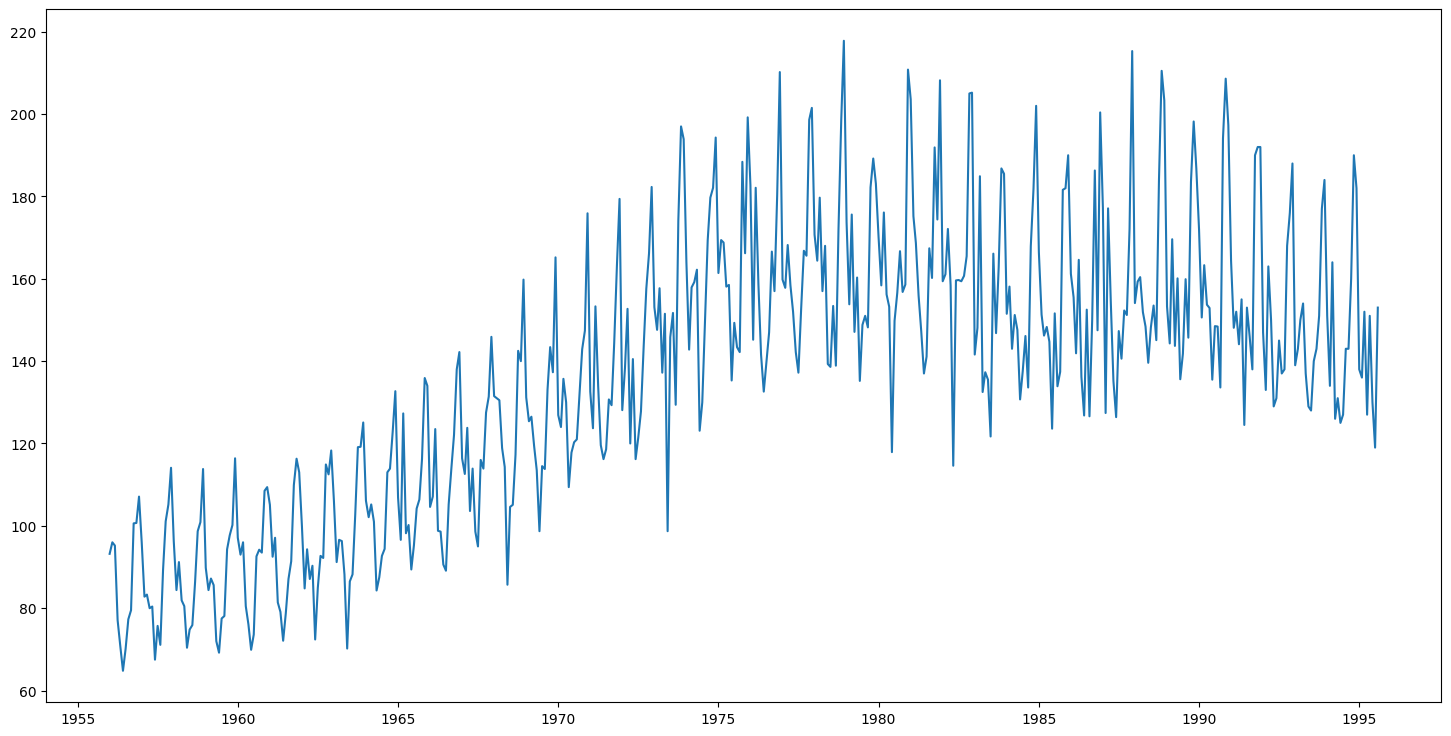

In [12]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

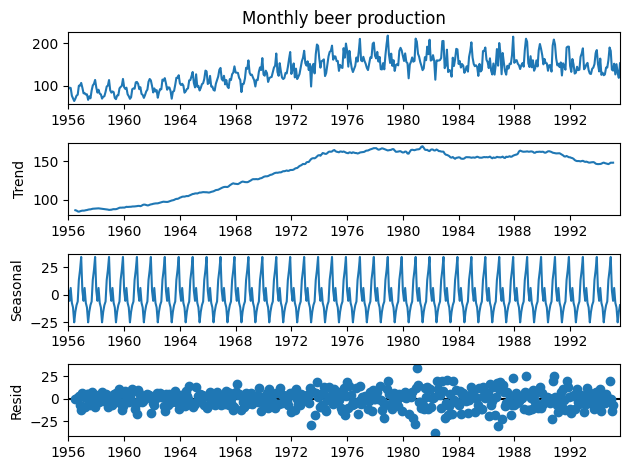

In [15]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

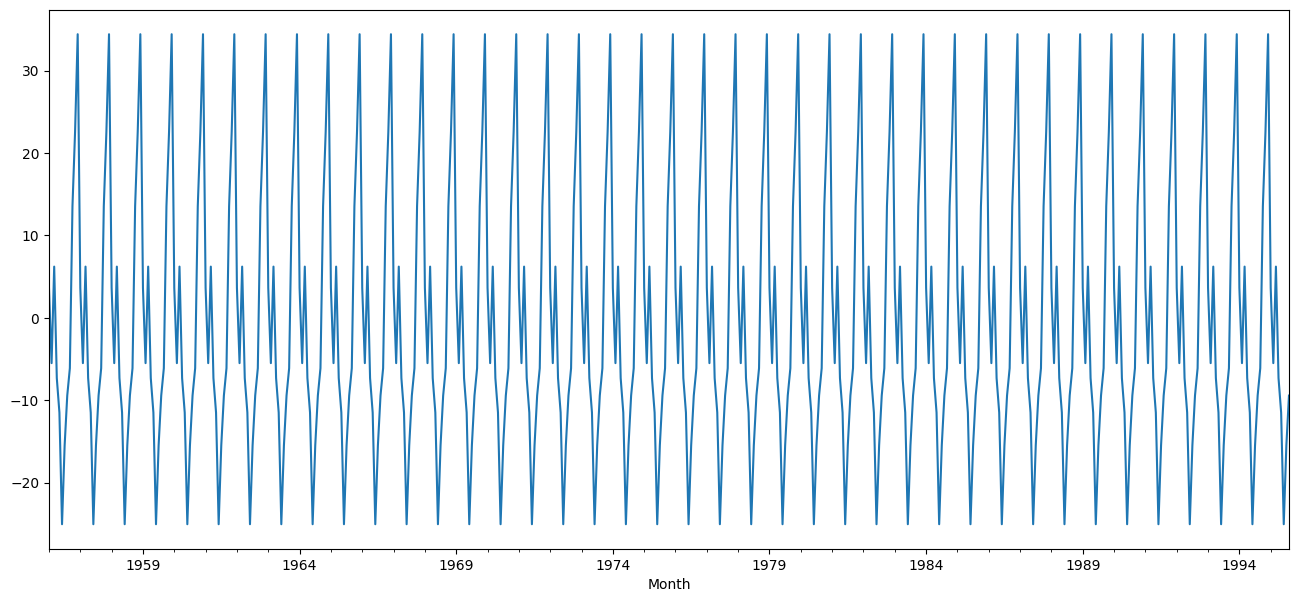

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

In [17]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [18]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.26226D-02

At iterate   15    f=  3.75357D+00    |proj g|=  5.39673D-02

At iterate   20    f=  3.71373D+00    |proj g|=  1.10300D-02

At iterate   25    f=  3.71142D+00    |proj g|=  1.83401D-02

At iterate   30    f=  3.70691D+00    |proj g|=  9.88448D-02

At iterate   35    f=  3.69003D+00    |proj g|=  3.50484D-02

At iterate   40    f=  3.68280D+00    |proj g|=  2.02803D-02

At iterate   45    f=  3.68120D+00    |proj g|=  3.83927D-03

At iterate   50    f=  3.68106D+00    |proj g|=  7.10812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.012
Date:                                    Thu, 16 Mar 2023   AIC                           3438.024
Time:                                            14:40:02   BIC                           3483.539
Sample:                                        01-01-1956   HQIC                          3455.942
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1203      0.032     -3.813      0.000      -0.182      -0.058
ar.L2         -0.1709      0.045     -3.769      0.000      -0.260      -0.082
ma.L1         -0.8451      0.026    -31.905      0.000      -0.897      -0.793
ar.S.L12       1.7477      0.101     17.253      0.000       1.549       1.946
ar.S.L24      -1.5970      0.199     -8.018      0.000      -1.987      -1.207
ar.S.L36       0.7769      0.155      5.007      0.000       0.473       1.081
ar.S.L48       0.0711      0.052      1.367      0.172      -0.031       0.173
ma.S.L12      -1.5496      0.118    -13.134      0.000      -1.781      -1.318
ma.S.L24       1.3859      0.200      6.935      0.000       0.994       1.778
ma.S.L36      -0.6602      0.117     -5.654      0.000      -0.889      -0.431
sigma2        83.6961      4.890     17.117      0.000      74.112      93.280
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                41.01
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.052113
1994-10-01    157.682117
1994-11-01    181.885300
1994-12-01    183.632310
1995-01-01    144.797182
1995-02-01    136.964486
1995-03-01    151.195517
1995-04-01    133.267756
1995-05-01    138.069303
1995-06-01    120.607987
1995-07-01    128.363082
1995-08-01    138.936548
Freq: MS, Name: ARIMA Predictions, dtype: float64

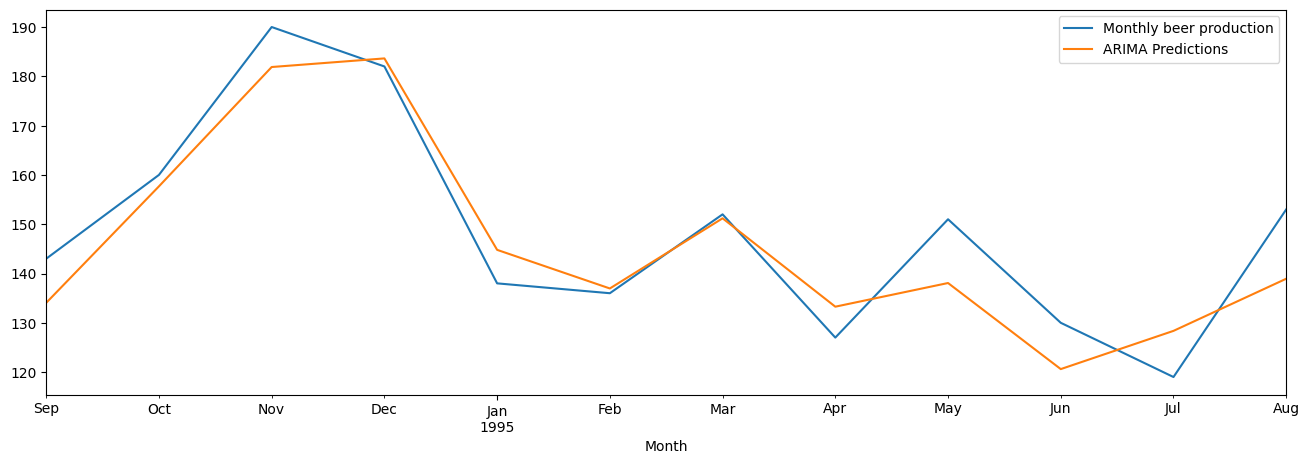

In [20]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [22]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.15623000710286
RMSE Error: 8.071940907062121
Mean: 136.3953781512605


In [24]:
test_data['ARIMA_Predictions'] = arima_pred

## Prophet Forecast

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [27]:
df_pr = df.copy()
df_pr = df.reset_index()

In [28]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [29]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [30]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [25]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.146328,130.580129,155.520878,151.096809,151.199086,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,0.0,0.0,0.0,143.189478
472,1995-05-01,151.082843,128.325335,152.223241,151.013419,151.157899,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,0.0,0.0,0.0,139.682552
473,1995-06-01,151.017241,114.049347,140.410441,150.928823,151.115121,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,0.0,0.0,0.0,127.101354
474,1995-07-01,150.953756,123.093340,147.432192,150.836001,151.071713,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,0.0,0.0,0.0,135.207201
475,1995-08-01,150.888155,128.671483,154.148952,150.744761,151.028365,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,0.0,0.0,0.0,141.679612


In [27]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [28]:
prophet_pred = prophet_pred.set_index("Date")

In [29]:
prophet_pred.index.freq = "MS"

In [30]:
prophet_pred

,Pred
Date,
1994-09-01,145.087502
1994-10-01,166.104924
1994-11-01,173.729015
1994-12-01,185.977964
1995-01-01,155.260571
1995-02-01,146.818146
1995-03-01,158.923972
1995-04-01,143.189478
1995-05-01,139.682552


In [31]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [33]:
import seaborn as sns

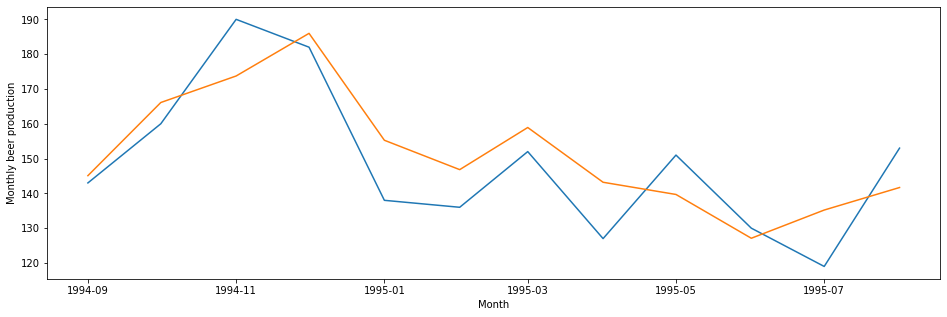

In [34]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [35]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.20903532674512
RMSE Error: 11.454651252951576
Mean: 136.39537815126045


In [37]:
rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

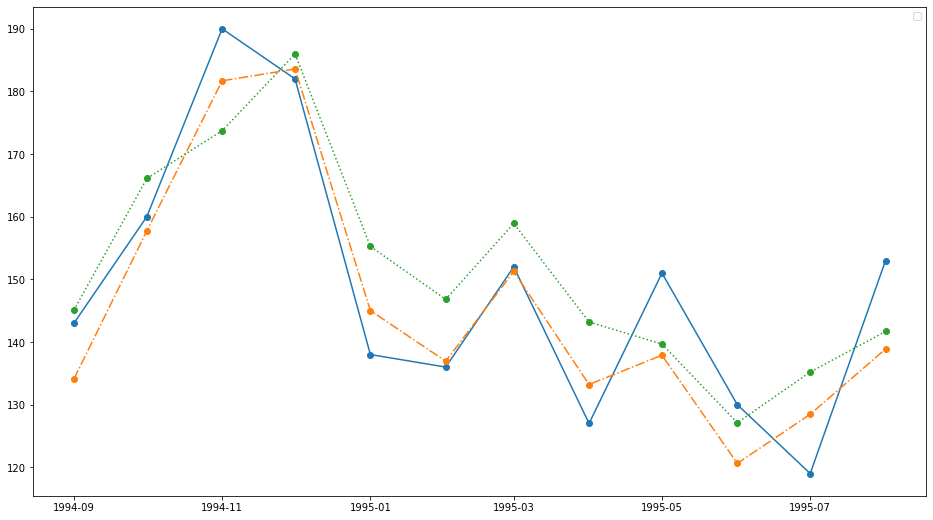

In [38]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [39]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.135337,66.183714
1,Prophet,11.454651,131.209035


In [40]:
test_data

,Monthly beer production,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,134.089767,145.087502
1994-10-01,160.0,157.743215,166.104924
1994-11-01,190.0,181.699293,173.729015
1994-12-01,182.0,183.580027,185.977964
1995-01-01,138.0,145.020490,155.260571
1995-02-01,136.0,136.932876,146.818146
1995-03-01,152.0,151.266328,158.923972
1995-04-01,127.0,133.215547,143.189478
1995-05-01,151.0,137.888877,139.682552
